In [185]:
import numpy as np
import pandas as pd
import itertools 
import matplotlib.pyplot as plt

In [186]:
df_nutresa = pd.read_csv("nutresa.csv")
df_nutresa

,Date,Price,Open,High,Low,Vol.,Change %
0,12/28/2023,"45,000.0","43,800.0","45,000.0","43,040.0",6.32K,2.97%
1,12/27/2023,"43,700.0","43,600.0","43,700.0","43,600.0",6.89K,-2.89%
2,12/22/2023,"45,000.0","45,500.0","45,500.0","44,100.0",8.51K,-1.53%
3,12/20/2023,"45,700.0","46,000.0","46,000.0","45,500.0",23.62K,-0.44%
4,12/19/2023,"45,900.0","46,880.0","46,880.0","45,800.0",39.62K,-2.30%
...,...,...,...,...,...,...,...
860,01/09/2020,"25,020.0","25,020.0","25,040.0","24,960.0",45.23K,0.00%
861,01/08/2020,"25,020.0","25,020.0","25,280.0","24,980.0",364.37K,-0.16%
862,01/07/2020,"25,060.0","25,300.0","25,300.0","25,060.0",10.61K,-0.87%
863,01/03/2020,"25,280.0","25,320.0","25,400.0","25,280.0",15.28K,0.72%


# Preprocesamiento

In [187]:
df_nutresa = df_nutresa.drop(columns=['Open','High','Low','Vol.'])

new_col = []
for percentage in df_nutresa['Change %']:
    new_col.append(float(percentage.strip('%')))
df_nutresa = df_nutresa.drop(columns=['Change %'])
df_nutresa.insert(2, 'Change%', new_col, True)

In [188]:
df_nutresa['Change%']

0      2.97
1     -2.89
2     -1.53
3     -0.44
4     -2.30
       ... 
860    0.00
861   -0.16
862   -0.87
863    0.72
864   -1.18
Name: Change%, Length: 865, dtype: float64

# Definición de estados

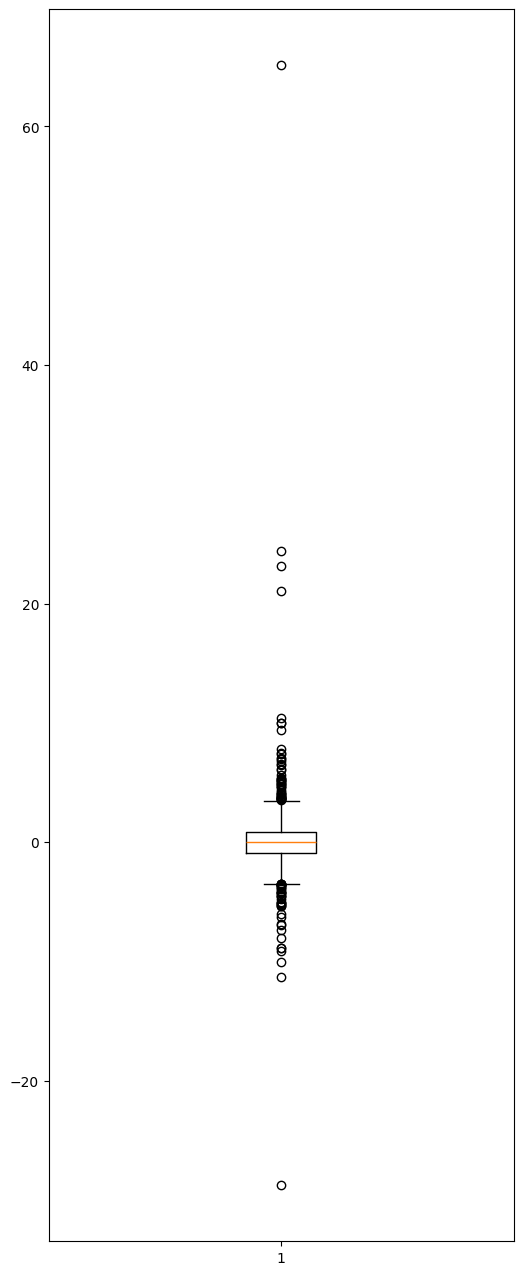

In [189]:
plt.figure(figsize=(6, 16))
plt.boxplot(df_nutresa['Change%'])

plt.show()

In [190]:
#8 estados, por desviacion general - RECHAZADA
new_col = []
desviacion = np.std(df_nutresa['Change%'])

for percentage in df_nutresa['Change%']:
    if percentage > (3 * desviacion):
        new_col.append('S4')
    elif percentage > (2 * desviacion):
        new_col.append('S3')
    elif percentage > desviacion:
        new_col.append('S2')
    elif percentage > 0:
        new_col.append('S1')
    elif percentage > -(desviacion):
        new_col.append('B1')
    elif percentage > -(2 * desviacion):
        new_col.append('B2')
    elif percentage > -(3 * desviacion):
        new_col.append('B3')
    else:
        new_col.append('B4')
#df_nutresa.insert(2, 'Estado', new_col, True)

In [191]:
#8 estados, por desviacion local - ACEPTADA
new_col = []
l = 30
data = df_nutresa['Change%']

for i, percentage in enumerate(data):
    min = int(i - l/2)
    max = int(i + l/2)
    if(i <= l/2):
        min = 0
        max = l
    elif(i >= len(data) - (l/2)):
        min = len(data) - l
        max = len(data)
        
    desviacion = np.std(data[min:max])

    if percentage > (3 * desviacion):
        new_col.append('S4')
    elif percentage > (2 * desviacion):
        new_col.append('S3')
    elif percentage > desviacion:
        new_col.append('S2')
    elif percentage > 0:
        new_col.append('S1')
    elif percentage > -(desviacion):
        new_col.append('B1')
    elif percentage > -(2 * desviacion):
        new_col.append('B2')
    elif percentage > -(3 * desviacion):
        new_col.append('B3')
    else:
        new_col.append('B4')
#df_nutresa.insert(2, 'Estado', new_col, True)

In [192]:
#6 estados, por desviacion local - ACEPTADA
new_col = []
l = 20
data = df_nutresa['Change%']

for i, percentage in enumerate(data):
    min = int(i - l/2)
    max = int(i + l/2)
    if(i <= l/2):
        min = 0
        max = l
    elif(i >= len(data) - (l/2)):
        min = len(data) - l
        max = len(data)
        
    desviacion = np.std(data[min:max])

    if percentage > (2 * desviacion):
        new_col.append('S3')
    elif percentage > desviacion:
        new_col.append('S2')
    elif percentage > 0:
        new_col.append('S1')
    elif percentage > -(desviacion):
        new_col.append('B1')
    elif percentage > -(2 * desviacion):
        new_col.append('B2')
    else:
        new_col.append('B3')
#df_nutresa.insert(2, 'Estado', new_col, True)

In [193]:
#5 estados, interpretacion de la grafica de caja y bigotes - ACEPTADA
new_col = []
for percentage in df_nutresa['Change%']:
    if percentage > 5:
        new_col.append('Sube+')
    elif percentage > 1:
        new_col.append('Sube')
    elif percentage > -1:
        new_col.append('Estable')
    elif percentage > -5:
        new_col.append('Baja')
    else:
        new_col.append('Baja+')
#df_nutresa.insert(2, 'Estado', new_col, True)

In [194]:
#5 estados, por desviacion general - RECHAZADA
new_col = []
l = 20
data = df_nutresa['Change%']
desviacion = np.std(data)

for i, percentage in enumerate(data):
    if percentage > (2 * desviacion):
        new_col.append('Sube+')
    elif percentage > (desviacion/2):
        new_col.append('Sube')
    elif percentage > -(desviacion/2):
        new_col.append('Estable')
    elif percentage > -(2 * desviacion):
        new_col.append('Baja')
    else:
        new_col.append('Baja+')
#df_nutresa.insert(2, 'Estado', new_col, True)

In [195]:
#5 estados, por desviacion local - ACEPTADA
new_col = []
l = 20
data = df_nutresa['Change%']

for i, percentage in enumerate(data):
    min = int(i - l/2)
    max = int(i + l/2)
    if(i <= l/2):
        min = 0
        max = l
    elif(i >= len(data) - (l/2)):
        min = len(data) - l
        max = len(data)
        
    desviacion = np.std(data[min:max])
    if percentage > (2 * desviacion):
        new_col.append('Sube+')
    elif percentage > (desviacion/2):
        new_col.append('Sube')
    elif percentage > -(desviacion/2):
        new_col.append('Estable')
    elif percentage > -(2 * desviacion):
        new_col.append('Baja')
    else:
        new_col.append('Baja+')
df_nutresa.insert(2, 'Estado', new_col, True)

In [196]:
df_nutresa

,Date,Price,Estado,Change%
0,12/28/2023,"45,000.0",Sube,2.97
1,12/27/2023,"43,700.0",Baja,-2.89
2,12/22/2023,"45,000.0",Baja,-1.53
3,12/20/2023,"45,700.0",Estable,-0.44
4,12/19/2023,"45,900.0",Baja,-2.30
...,...,...,...,...
860,01/09/2020,"25,020.0",Estable,0.00
861,01/08/2020,"25,020.0",Estable,-0.16
862,01/07/2020,"25,060.0",Baja,-0.87
863,01/03/2020,"25,280.0",Sube,0.72


In [197]:
#estados_posibles = ['B4','B3','B2','B1','S1','S2','S3','S4']
#estados_posibles = ['B3','B2','B1','S1','S2','S3']
estados_posibles = ['Baja+','Baja','Estable','Sube','Sube+']

total_cols = len(estados_posibles)
total_rows = total_cols*total_cols

In [198]:
estados = np.array(df_nutresa['Estado'])

markovian_table = np.array(estados)
estados = np.delete(estados, 0)
estados = np.append(estados, 0)
markovian_table = np.vstack([markovian_table,estados])
estados = np.delete(estados, 0)
estados = np.append(estados, 0)
markovian_table = np.vstack([markovian_table,estados])

markovian_table = markovian_table.T
markovian_table = np.delete(markovian_table, [-1, -2], axis=0)
markovian_table 

array([['Sube', 'Baja', 'Baja'],
       ['Baja', 'Baja', 'Estable'],
       ['Baja', 'Estable', 'Baja'],
       ...,
       ['Estable', 'Estable', 'Baja'],
       ['Estable', 'Baja', 'Sube'],
       ['Baja', 'Sube', 'Baja']], dtype=object)

In [199]:
expected_freq = [[0] * (total_cols + 1) for i in range(total_cols)]

for i in range(len(markovian_table)):
    actual = markovian_table[i][1]
    row_index = estados_posibles.index(actual)
    col_index = estados_posibles.index(markovian_table[i][2])

    expected_freq[row_index][col_index] += 1
    expected_freq[row_index][total_cols] += 1

cols = estados_posibles.copy()
cols.append('Recuento')
expected_freq_df = pd.DataFrame(expected_freq, columns=cols)
cols.pop(-1)
expected_freq_df.insert(0, 'T_Actual', cols)
expected_freq_df

,T_Actual,Baja+,Baja,Estable,Sube,Sube+,Recuento
0,Baja+,0,8,11,5,3,27
1,Baja,4,38,88,53,7,190
2,Estable,12,82,239,84,14,431
3,Sube,10,56,82,34,3,185
4,Sube+,1,6,11,9,3,30


In [200]:
invalid_counter = 0

for i in range(total_cols):
    for j in range(1,total_cols + 1):
        if expected_freq_df.iat[i, j] < 5:
            invalid_counter += 1
            
cumple_empirica = invalid_counter < 0.25 * (total_cols ** 2)
print(f'Cumple la empírica? RTA: {cumple_empirica}') 

Cumple la empírica? RTA: True


# Modelo - Matriz de transición

In [201]:
model_freq = [[0] * total_cols for i in range(total_cols)]
total_freq = [0,0,0,0,0,0,0,0]

for i in range(len(markovian_table)):
    actual = markovian_table[i][1]
    row_index = estados_posibles.index(actual)
    col_index = estados_posibles.index(markovian_table[i][2])

    model_freq[row_index][col_index] += 1
    total_freq[row_index] += 1

model_transition_prob_df = pd.DataFrame(model_freq, columns=estados_posibles)
model_transition_prob_df.insert(0, 'Actual', estados_posibles)

for i in range(total_cols):
    for j in range(1,total_cols+1):
        model_transition_prob_df.iat[i, j] = (model_transition_prob_df.iat[i, j]/total_freq[i]).astype(float)

model_transition_prob_df

C:\Users\Hector\AppData\Local\Temp\ipykernel_8032\746005964.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.2962962962962963' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  model_transition_prob_df.iat[i, j] = (model_transition_prob_df.iat[i, j]/total_freq[i]).astype(float)
C:\Users\Hector\AppData\Local\Temp\ipykernel_8032\746005964.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.4074074074074074' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  model_transition_prob_df.iat[i, j] = (model_transition_prob_df.iat[i, j]/total_freq[i]).astype(float)
C:\Users\Hector\AppData\Local\Temp\ipykernel_8032\746005964.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of panda

,Actual,Baja+,Baja,Estable,Sube,Sube+
0,Baja+,0.000000,0.296296,0.407407,0.185185,0.111111
1,Baja,0.021053,0.200000,0.463158,0.278947,0.036842
2,Estable,0.027842,0.190255,0.554524,0.194896,0.032483
3,Sube,0.054054,0.302703,0.443243,0.183784,0.016216
4,Sube+,0.033333,0.200000,0.366667,0.300000,0.100000


# Propiedad Markoviana

In [202]:
observed_rows = list(itertools.product(estados_posibles,repeat=2))

observed_freq = [[0] * (total_cols + 1) for i in range(total_rows)]

for i in range(len(markovian_table)):
    history = (markovian_table[i][0],markovian_table[i][1])
    row_index = observed_rows.index(history)
    col_index = estados_posibles.index(markovian_table[i][2])

    observed_freq[row_index][col_index] += 1
    observed_freq[row_index][total_cols] += 1

cols = estados_posibles.copy()
cols.append('Recuento')
observed_freq_df = pd.DataFrame(observed_freq, columns=cols)
observed_freq_df.insert(0, 'History', observed_rows)
observed_freq_df

,History,Baja+,Baja,Estable,Sube,Sube+,Recuento
0,"(Baja+, Baja+)",0,0,0,0,0,0
1,"(Baja+, Baja)",0,4,3,1,0,8
2,"(Baja+, Estable)",0,2,8,1,0,11
3,"(Baja+, Sube)",0,2,2,1,0,5
4,"(Baja+, Sube+)",0,1,1,1,0,3
5,"(Baja, Baja+)",0,3,0,1,0,4
6,"(Baja, Baja)",0,7,22,9,0,38
7,"(Baja, Estable)",4,23,46,13,2,88
8,"(Baja, Sube)",3,18,25,6,1,53
9,"(Baja, Sube+)",0,2,3,1,1,7


In [203]:
observed_prob_df = observed_freq_df.copy()
for i in range(total_rows):
    for j in range(1,total_cols+1):
        if observed_prob_df.iat[i, total_cols+1] == 0:
            observed_prob_df.iat[i, j] = 0
        else:
            observed_prob_df.iat[i, j] = (observed_prob_df.iat[i, j]/observed_prob_df.iat[i, total_cols+1]).astype(float)

observed_prob_df = observed_prob_df.drop(columns=['Recuento'], axis=1)
observed_prob_df

C:\Users\Hector\AppData\Local\Temp\ipykernel_8032\1372542959.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  observed_prob_df.iat[i, j] = (observed_prob_df.iat[i, j]/observed_prob_df.iat[i, total_cols+1]).astype(float)
C:\Users\Hector\AppData\Local\Temp\ipykernel_8032\1372542959.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.375' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  observed_prob_df.iat[i, j] = (observed_prob_df.iat[i, j]/observed_prob_df.iat[i, total_cols+1]).astype(float)
C:\Users\Hector\AppData\Local\Temp\ipykernel_8032\1372542959.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.

,History,Baja+,Baja,Estable,Sube,Sube+
0,"(Baja+, Baja+)",0.000000,0.000000,0.000000,0.000000,0.000000
1,"(Baja+, Baja)",0.000000,0.500000,0.375000,0.125000,0.000000
2,"(Baja+, Estable)",0.000000,0.181818,0.727273,0.090909,0.000000
3,"(Baja+, Sube)",0.000000,0.400000,0.400000,0.200000,0.000000
4,"(Baja+, Sube+)",0.000000,0.333333,0.333333,0.333333,0.000000
5,"(Baja, Baja+)",0.000000,0.750000,0.000000,0.250000,0.000000
6,"(Baja, Baja)",0.000000,0.184211,0.578947,0.236842,0.000000
7,"(Baja, Estable)",0.045455,0.261364,0.522727,0.147727,0.022727
8,"(Baja, Sube)",0.056604,0.339623,0.471698,0.113208,0.018868
9,"(Baja, Sube+)",0.000000,0.285714,0.428571,0.142857,0.142857


In [204]:
expected_freq = [[0] * (total_cols + 1) for i in range(total_cols)]

for i in range(len(markovian_table)):
    actual = markovian_table[i][1]
    row_index = estados_posibles.index(actual)
    col_index = estados_posibles.index(markovian_table[i][2])

    expected_freq[row_index][col_index] += 1
    expected_freq[row_index][total_cols] += 1

cols = estados_posibles.copy()
cols.append('Recuento')
expected_freq_df = pd.DataFrame(expected_freq, columns=cols)
cols.pop(-1)
expected_freq_df.insert(0, 'History', cols)
expected_freq_df

,History,Baja+,Baja,Estable,Sube,Sube+,Recuento
0,Baja+,0,8,11,5,3,27
1,Baja,4,38,88,53,7,190
2,Estable,12,82,239,84,14,431
3,Sube,10,56,82,34,3,185
4,Sube+,1,6,11,9,3,30


In [205]:
expected_prob_df = expected_freq_df.copy()
for i in range(total_cols):
    for j in range(1,total_cols+1):
        expected_prob_df.iat[i, j] = (expected_prob_df.iat[i, j]/expected_prob_df.iat[i, total_cols+1]).astype(float)

expected_prob_df = expected_prob_df.drop(columns=['Recuento'], axis=1)
expected_prob_df

C:\Users\Hector\AppData\Local\Temp\ipykernel_8032\1491194249.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.2962962962962963' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  expected_prob_df.iat[i, j] = (expected_prob_df.iat[i, j]/expected_prob_df.iat[i, total_cols+1]).astype(float)
C:\Users\Hector\AppData\Local\Temp\ipykernel_8032\1491194249.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.4074074074074074' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  expected_prob_df.iat[i, j] = (expected_prob_df.iat[i, j]/expected_prob_df.iat[i, total_cols+1]).astype(float)
C:\Users\Hector\AppData\Local\Temp\ipykernel_8032\1491194249.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future 

,History,Baja+,Baja,Estable,Sube,Sube+
0,Baja+,0.000000,0.296296,0.407407,0.185185,0.111111
1,Baja,0.021053,0.200000,0.463158,0.278947,0.036842
2,Estable,0.027842,0.190255,0.554524,0.194896,0.032483
3,Sube,0.054054,0.302703,0.443243,0.183784,0.016216
4,Sube+,0.033333,0.200000,0.366667,0.300000,0.100000


In [206]:
chi_values = []
k = 0

for i in range(total_rows):
    for j in range(1,total_cols+1):
        if expected_prob_df.iat[k,j] == 0:
            chi_parcial = (0)
        else: 
            chi_parcial = observed_freq_df.iat[i,total_cols+1] * ((observed_prob_df.iat[i,j] - expected_prob_df.iat[k,j]) ** 2) / expected_prob_df.iat[k,j]

        chi_values.append(chi_parcial)

    k += 1
    if k == total_cols:
        k = 0

chi_observado = sum(chi_values)
chi_observado

93.70582806335062

In [207]:
from scipy.stats.distributions import chi2

alpha = 0.01
rows = total_rows
cols = total_cols
grados = (rows - 1)*(cols - 1)

chi_teorico = chi2.ppf(1 - alpha, df=grados)
chi_teorico

131.141216667052

In [208]:
is_not_markovian = chi_observado >= chi_teorico
print(f'Se rechaza la cadena (no es markoviana)? RTA: {is_not_markovian}')

Se rechaza la cadena (no es markoviana)? RTA: False


# Propiedad Estacionaria

Definiremos los periodos de tiempo como años

In [209]:
new_col = []
for date in df_nutresa['Date']:
    if '2020' in date:
        new_col.append(1)
    elif '2021' in date:
        new_col.append(2)
    elif '2022' in date:
        new_col.append(3)
    else:
        new_col.append(4)
df_nutresa.insert(2, 'Periodo', new_col, True)

df_nutresa

,Date,Price,Periodo,Estado,Change%
0,12/28/2023,"45,000.0",4,Sube,2.97
1,12/27/2023,"43,700.0",4,Baja,-2.89
2,12/22/2023,"45,000.0",4,Baja,-1.53
3,12/20/2023,"45,700.0",4,Estable,-0.44
4,12/19/2023,"45,900.0",4,Baja,-2.30
...,...,...,...,...,...
860,01/09/2020,"25,020.0",1,Estable,0.00
861,01/08/2020,"25,020.0",1,Estable,-0.16
862,01/07/2020,"25,060.0",1,Baja,-0.87
863,01/03/2020,"25,280.0",1,Sube,0.72


In [210]:
periodos = np.array(df_nutresa['Periodo'])
estados = np.array(df_nutresa['Estado'])

stationary_table = np.array(periodos)
stationary_table = np.vstack([stationary_table, estados])
estados = np.delete(estados, 0)
estados = np.append(estados, 0)
stationary_table = np.vstack([stationary_table, estados])

stationary_table = stationary_table.T
stationary_table = np.delete(stationary_table, -1, axis=0)
stationary_table 

array([[4, 'Sube', 'Baja'],
       [4, 'Baja', 'Baja'],
       [4, 'Baja', 'Estable'],
       ...,
       [1, 'Estable', 'Baja'],
       [1, 'Baja', 'Sube'],
       [1, 'Sube', 'Baja']], dtype=object)

In [211]:
observed_rows = list(itertools.product([1,2,3,4], estados_posibles))

observed_freq = [[0] * (total_cols + 1) for i in range(len(observed_rows))]

for i in range(len(markovian_table)):
    history = (stationary_table[i][0], stationary_table[i][1])
    row_index = observed_rows.index(history)
    col_index = estados_posibles.index(stationary_table[i][2])

    observed_freq[row_index][col_index] += 1
    observed_freq[row_index][total_cols] += 1

cols = estados_posibles.copy()
cols.append('Recuento')
observed_freq_stat_df = pd.DataFrame(observed_freq, columns=cols)
observed_freq_stat_df.insert(0, 'History', observed_rows)
observed_freq_stat_df

,History,Baja+,Baja,Estable,Sube,Sube+,Recuento
0,"(1, Baja+)",0,0,4,2,1,7
1,"(1, Baja)",0,11,25,16,3,55
2,"(1, Estable)",6,30,53,23,4,116
3,"(1, Sube)",1,11,31,10,0,53
4,"(1, Sube+)",0,2,3,3,0,8
5,"(2, Baja+)",0,3,3,1,1,8
6,"(2, Baja)",2,14,23,15,1,55
7,"(2, Estable)",2,19,66,23,5,115
8,"(2, Sube)",4,19,19,12,0,54
9,"(2, Sube+)",0,1,3,3,0,7


In [212]:
observed_prob_stat_df = observed_freq_stat_df.copy()
for i in range(len(observed_rows)):
    for j in range(1,total_cols+1):
        if observed_prob_stat_df.iat[i, total_cols+1] == 0:
            observed_prob_stat_df.iat[i, j] = 0
        else:
            observed_prob_stat_df.iat[i, j] = (observed_prob_stat_df.iat[i, j]/observed_prob_stat_df.iat[i, total_cols+1]).astype(float)

observed_prob_stat_df = observed_prob_stat_df.drop(columns=['Recuento'], axis=1)
observed_prob_stat_df

C:\Users\Hector\AppData\Local\Temp\ipykernel_8032\1821551178.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.5714285714285714' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  observed_prob_stat_df.iat[i, j] = (observed_prob_stat_df.iat[i, j]/observed_prob_stat_df.iat[i, total_cols+1]).astype(float)
C:\Users\Hector\AppData\Local\Temp\ipykernel_8032\1821551178.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.2857142857142857' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  observed_prob_stat_df.iat[i, j] = (observed_prob_stat_df.iat[i, j]/observed_prob_stat_df.iat[i, total_cols+1]).astype(float)
C:\Users\Hector\AppData\Local\Temp\ipykernel_8032\1821551178.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and wi

,History,Baja+,Baja,Estable,Sube,Sube+
0,"(1, Baja+)",0.000000,0.000000,0.571429,0.285714,0.142857
1,"(1, Baja)",0.000000,0.200000,0.454545,0.290909,0.054545
2,"(1, Estable)",0.051724,0.258621,0.456897,0.198276,0.034483
3,"(1, Sube)",0.018868,0.207547,0.584906,0.188679,0.000000
4,"(1, Sube+)",0.000000,0.250000,0.375000,0.375000,0.000000
5,"(2, Baja+)",0.000000,0.375000,0.375000,0.125000,0.125000
6,"(2, Baja)",0.036364,0.254545,0.418182,0.272727,0.018182
7,"(2, Estable)",0.017391,0.165217,0.573913,0.200000,0.043478
8,"(2, Sube)",0.074074,0.351852,0.351852,0.222222,0.000000
9,"(2, Sube+)",0.000000,0.142857,0.428571,0.428571,0.000000


In [213]:
expected_prob_df

,History,Baja+,Baja,Estable,Sube,Sube+
0,Baja+,0.000000,0.296296,0.407407,0.185185,0.111111
1,Baja,0.021053,0.200000,0.463158,0.278947,0.036842
2,Estable,0.027842,0.190255,0.554524,0.194896,0.032483
3,Sube,0.054054,0.302703,0.443243,0.183784,0.016216
4,Sube+,0.033333,0.200000,0.366667,0.300000,0.100000


In [214]:
chi_values = []
k = 0

for i in range(len(observed_rows)):
    for j in range(1,total_cols+1):
        if expected_prob_df.iat[k,j] == 0:
            chi_parcial = 0
        else: 
            chi_parcial = observed_freq_stat_df.iat[i,total_cols+1] * ((observed_prob_stat_df.iat[i,j] - expected_prob_df.iat[k,j]) ** 2) / expected_prob_df.iat[k,j]

        chi_values.append(chi_parcial)

    k += 1
    if k == total_cols:
        k = 0

chi_stat_observado = sum(chi_values)
chi_stat_observado

65.93395969096666

In [215]:
is_not_stationary = chi_stat_observado >= chi_teorico
print(f'La cadena no cumple la propiedad estacionaria? RTA: {is_not_stationary}')

La cadena no cumple la propiedad estacionaria? RTA: False
